In [2]:
%run ./scr/main.py
import plotly.express as px

In [3]:
data = "./data/"

In [4]:
df_delinquency = pd.read_excel(data+"mortgage-delinquency-rate-ca-prov-cmas-2012-q3-2020-q4-en.xlsx")
#df_delinquency.head()

In [5]:
new_column = df_delinquency.iloc[3]
df_delinquency = df_delinquency[4:]
df_delinquency.columns = new_column

In [6]:
df_delinquency = df_delinquency.iloc[:-22, 1:]
df_delinquency.reset_index(inplace=True)
# Remove 'index' column 
df_delinquency.drop(['index'], inplace=True, axis=1)
#df_delinquency[df_delinquency['Geography']=='Selected Metropolitan Areas'].index.values

In [8]:
df_delinquency.drop([1,12], inplace=True, axis=0) #drop 2 rows
df_delinquency.reset_index(inplace=True)
df_delinquency.drop(['index'],inplace=True,axis=1)

In [10]:
df_delinquency['Region/City'] = ""
df_delinquency['Region/City'][df_delinquency.index ==0] = 'Country'
df_delinquency['Region/City'][(df_delinquency.index < 11) & (df_delinquency.index >0)] = 'Province'
df_delinquency['Region/City'][df_delinquency.index >= 11] = 'City'

In [12]:
# Access columns
cols = df_delinquency.columns.tolist()
# Bring last col to front
cols = cols[-1:] + cols[:-1]
# Set new column order
df_delinquency = df_delinquency[cols] 

In [19]:
# Isolate yearly and quarterly columns and convert to numeric.
int_cols = df_delinquency.columns.drop(['Region/City', 'Geography'])
df_delinquency[int_cols] = df_delinquency[int_cols].apply(pd.to_numeric, errors='coerce')
#df_delinquency.info()

In [22]:
df_province = df_delinquency[df_delinquency['Region/City']=='Province']

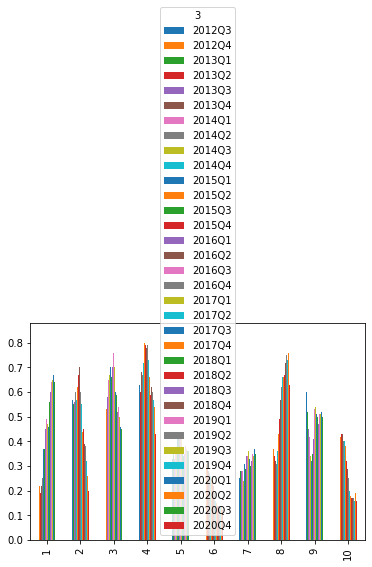

In [23]:
df_province.plot(kind='bar')